In [1]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

# GEO EM FILE

In [3]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'][0,:,:]

# time, LAT, LON ncfiles

In [4]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

# import FMAASO 400 data

In [91]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')

pblh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PBLH' + filename_suffix)
tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp_zcoords.nc')

ph_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PH' + '_ens_mean_vinterp_zcoords.nc')
phb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PHB' + '_ens_mean_vinterp_zcoords.nc')

p_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'P' + '_ens_mean_vinterp_zcoords.nc')
pb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PB' + '_ens_mean_vinterp_zcoords.nc')

u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')
#v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')

qvapor_ncfile.set_auto_mask(False)
tk_ncfile.set_auto_mask(False)
ph_ncfile.set_auto_mask(False)
phb_ncfile.set_auto_mask(False)
u_ncfile.set_auto_mask(False)
#v_ncfile.set_auto_mask(False)
w_ncfile.set_auto_mask(False)

In [92]:
rainc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINC' + filename_suffix)
rainnc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINNC' + filename_suffix)

In [6]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

z = qvapor_ncfile.variables['z'][:]
qvapor_400 = qvapor_ncfile.variables['QVAPOR'][:]
tk_400 = tk_ncfile.variables['TK'][:]
ph_400 = ph_ncfile.variables['PH'][:]
phb_400 = phb_ncfile.variables['PHB'][:]

pblh_400 = pblh_ncfile.variables['PBLH'][:]
u_400 = u_ncfile.variables['U'][:]
#v_400 = v_ncfile.variables['V'][:]
w_400 = w_ncfile.variables['W'][:]

p_400 = p_ncfile.variables['P'][:]
pb_400 = pb_ncfile.variables['PB'][:]

In [93]:
rainc_400 = rainc_ncfile.variables['RAINC'][:]
rainnc_400 = rainnc_ncfile.variables['RAINNC'][:]

In [7]:
qvapor_400[qvapor_400>1e10]=numpy.nan
tk_400[tk_400>1e10]=numpy.nan
ph_400[ph_400>1e10]=numpy.nan
phb_400[phb_400>1e10]=numpy.nan
u_400[u_400>1e10]=numpy.nan
#v_400[v_400>1e10]=numpy.nan
w_400[w_400>1e10]=numpy.nan
p_400[p_400>1e10]=numpy.nan
pb_400[pb_400>1e10]=numpy.nan

# import FMAASO 1000 data

In [94]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')

pblh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PBLH' + filename_suffix)
tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp_zcoords.nc')
ph_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PH' + '_ens_mean_vinterp_zcoords.nc')
phb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PHB' + '_ens_mean_vinterp_zcoords.nc')

p_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'P' + '_ens_mean_vinterp_zcoords.nc')
pb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PB' + '_ens_mean_vinterp_zcoords.nc')

w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')

rainc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINC' + filename_suffix)
rainnc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINNC' + filename_suffix)

#v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')

qvapor_ncfile.set_auto_mask(False)
tk_ncfile.set_auto_mask(False)
ph_ncfile.set_auto_mask(False)
phb_ncfile.set_auto_mask(False)
u_ncfile.set_auto_mask(False)
w_ncfile.set_auto_mask(False)
#v_ncfile.set_auto_mask(False)

In [9]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

qvapor_1000 = qvapor_ncfile.variables['QVAPOR'][:]
tk_1000 = tk_ncfile.variables['TK'][:]

pblh_1000 = pblh_ncfile.variables['PBLH'][:]
ph_1000 = ph_ncfile.variables['PH'][:]
phb_1000 = phb_ncfile.variables['PHB'][:]

p_1000 = p_ncfile.variables['P'][:]
pb_1000 = pb_ncfile.variables['PB'][:]

u_1000 = u_ncfile.variables['U'][:]
#v_1000 = v_ncfile.variables['V'][:]
w_1000 = w_ncfile.variables['W'][:]

In [95]:
rainc_1000 = rainc_ncfile.variables['RAINC'][:]
rainnc_1000 = rainnc_ncfile.variables['RAINNC'][:]

In [10]:
qvapor_1000[qvapor_1000>1e10]=numpy.nan
tk_1000[tk_1000>1e10]=numpy.nan
ph_1000[ph_1000>1e10]=numpy.nan
phb_1000[phb_1000>1e10]=numpy.nan
u_1000[u_1000>1e10] = numpy.nan
#v_1000[v_1000>1e10] = numpy.nan
w_1000[w_1000>1e10] = numpy.nan

p_1000[p_1000>1e10]=numpy.nan
pb_1000[pb_1000>1e10]=numpy.nan

In [11]:
ph_tot_400 = ph_400+phb_400
ph_tot_1000 = ph_400+phb_1000

p_tot_400 = p_400+pb_400
p_tot_1000 = p_1000+pb_1000
#ph_tot_400[ph_tot_400>1e10]=numpy.nan
#ph_tot_1000[ph_tot_1000>1e10]=numpy.nan

In [12]:
ph_400 = None
phb_400 = None
ph_1000 = None
phb_1000 = None

p_400 = None
pb_400 = None
p_1000 = None
pb_1000 = None

# get time stamps

In [13]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

In [14]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

# constants

In [15]:
L_v = 2264705.0 # J/kg
c_p = 1005.7 # J/kgK
g = 9.80665 # m/s2

# lat indices subset

In [16]:
lat_hi = 10.
lat_lo = -10.
# subset between lat_hi and lat_lo
lat_indices = (xlat<=lat_hi)&(xlat>=lat_lo)

# qvapor diffs

In [17]:
qvapor_diffs = qvapor_1000 - qvapor_400

In [18]:
qvapor_diffs_lat_subset = qvapor_diffs[:,:,lat_indices[:,0],:]
qvapor_400_lat_subset = qvapor_400[:,:,lat_indices[:,0],:]

In [19]:
qvapor_diffs_lat_mean = numpy.nanmean(qvapor_diffs_lat_subset, axis=2)
qvapor_400_lat_mean = numpy.nanmean(qvapor_400_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


# raintot diffs

In [105]:
raintot_400 = rainc_400+rainnc_400
raintot_1000 = rainc_1000+rainnc_1000

raintot_diffs = raintot_1000-raintot_400

raintot_diffs_lat_subset = raintot_diffs[:,lat_indices[:,0],:]
raintot_400_lat_subset = raintot_400[:,lat_indices[:,0],:]

In [106]:
# calculate 3 hourly means for 400
raintot_400_t00mean = numpy.nanmean(raintot_400_lat_subset[skip_time:,:,:][times_00,:,:], axis=0)
raintot_400_t03mean = numpy.nanmean(raintot_400_lat_subset[skip_time:,:,:][times_03,:,:], axis=0)
raintot_400_t06mean = numpy.nanmean(raintot_400_lat_subset[skip_time:,:,:][times_06,:,:], axis=0)
raintot_400_t09mean = numpy.nanmean(raintot_400_lat_subset[skip_time:,:,:][times_09,:,:], axis=0)
raintot_400_t12mean = numpy.nanmean(raintot_400_lat_subset[skip_time:,:,:][times_12,:,:], axis=0)
raintot_400_t15mean = numpy.nanmean(raintot_400_lat_subset[skip_time:,:,:][times_15,:,:], axis=0)
raintot_400_t18mean = numpy.nanmean(raintot_400_lat_subset[skip_time:,:,:][times_18,:,:], axis=0)
raintot_400_t21mean = numpy.nanmean(raintot_400_lat_subset[skip_time:,:,:][times_21,:,:], axis=0)

raintot_1000_t00mean = numpy.nanmean(raintot_diffs_lat_subset[skip_time:,:,:][times_00,:,:], axis=0)
raintot_1000_t03mean = numpy.nanmean(raintot_diffs_lat_subset[skip_time:,:,:][times_03,:,:], axis=0)
raintot_1000_t06mean = numpy.nanmean(raintot_diffs_lat_subset[skip_time:,:,:][times_06,:,:], axis=0)
raintot_1000_t09mean = numpy.nanmean(raintot_diffs_lat_subset[skip_time:,:,:][times_09,:,:], axis=0)
raintot_1000_t12mean = numpy.nanmean(raintot_diffs_lat_subset[skip_time:,:,:][times_12,:,:], axis=0)
raintot_1000_t15mean = numpy.nanmean(raintot_diffs_lat_subset[skip_time:,:,:][times_15,:,:], axis=0)
raintot_1000_t18mean = numpy.nanmean(raintot_diffs_lat_subset[skip_time:,:,:][times_18,:,:], axis=0)
raintot_1000_t21mean = numpy.nanmean(raintot_diffs_lat_subset[skip_time:,:,:][times_21,:,:], axis=0)

raintot_400_array = numpy.array([raintot_400_t00mean, raintot_400_t03mean, raintot_400_t06mean, raintot_400_t09mean, raintot_400_t12mean, raintot_400_t15mean, raintot_400_t18mean, raintot_400_t21mean])
raintot_diffs_array = numpy.array([raintot_1000_t00mean, raintot_1000_t03mean, raintot_1000_t06mean, raintot_1000_t09mean, raintot_1000_t12mean, raintot_1000_t15mean, raintot_1000_t18mean, raintot_1000_t21mean])

#raintot_diffs = raintot_1000_array - raintot_400_array
#raintot_diffs_landmask = numpy.copy(raintot_diffs)
#raintot_diffs_landmask[:,landmask==0] = numpy.nan

In [123]:
raintot_hourly_400_diff = numpy.zeros((raintot_400.shape))*numpy.nan
raintot_hourly_400_diff[:-1,:,:] = numpy.diff(raintot_400, axis=0)#*(24./3) # convert to mm/day

raintot_hourly_1000_diff = numpy.zeros((raintot_1000.shape))*numpy.nan
raintot_hourly_1000_diff[:-1,:,:] = numpy.diff(raintot_1000, axis=0)#*(24./3) # convert to mm/day

raintot_hourly_diffs = raintot_hourly_1000_diff-raintot_hourly_400_diff
raintot_hourly_diffs_lat_subset = raintot_hourly_diffs[:,lat_indices[:,0],:]
# raintot_400_t00mean = numpy.nanmean(raintot_hourly_400_lat_subset[skip_time:,:,:][times_00,:,:], axis=0)
# raintot_400_t03mean = numpy.nanmean(raintot_hourly_400_lat_subset[skip_time:,:,:][times_03,:,:], axis=0)
# raintot_400_t06mean = numpy.nanmean(raintot_hourly_400_lat_subset[skip_time:,:,:][times_06,:,:], axis=0)
# raintot_400_t09mean = numpy.nanmean(raintot_hourly_400_lat_subset[skip_time:,:,:][times_09,:,:], axis=0)
# raintot_400_t12mean = numpy.nanmean(raintot_hourly_400_lat_subset[skip_time:,:,:][times_12,:,:], axis=0)
# raintot_400_t15mean = numpy.nanmean(raintot_hourly_400_lat_subset[skip_time:,:,:][times_15,:,:], axis=0)
# raintot_400_t18mean = numpy.nanmean(raintot_hourly_400_lat_subset[skip_time:,:,:][times_18,:,:], axis=0)
# raintot_400_t21mean = numpy.nanmean(raintot_hourly_400_lat_subset[skip_time:,:,:][times_21,:,:], axis=0)

# raintot_1000_t00mean = numpy.nanmean(raintot_hourly_1000_lat_subset[skip_time:,:,:][times_00,:,:], axis=0)
# raintot_1000_t03mean = numpy.nanmean(raintot_hourly_1000_lat_subset[skip_time:,:,:][times_03,:,:], axis=0)
# raintot_1000_t06mean = numpy.nanmean(raintot_hourly_1000_lat_subset[skip_time:,:,:][times_06,:,:], axis=0)
# raintot_1000_t09mean = numpy.nanmean(raintot_hourly_1000_lat_subset[skip_time:,:,:][times_09,:,:], axis=0)
# raintot_1000_t12mean = numpy.nanmean(raintot_hourly_1000_lat_subset[skip_time:,:,:][times_12,:,:], axis=0)
# raintot_1000_t15mean = numpy.nanmean(raintot_hourly_1000_lat_subset[skip_time:,:,:][times_15,:,:], axis=0)
# raintot_1000_t18mean = numpy.nanmean(raintot_hourly_1000_lat_subset[skip_time:,:,:][times_18,:,:], axis=0)
# raintot_1000_t21mean = numpy.nanmean(raintot_hourly_1000_lat_subset[skip_time:,:,:][times_21,:,:], axis=0)

# raintot_400_array = numpy.array([raintot_400_t00mean, raintot_400_t03mean, raintot_400_t06mean, raintot_400_t09mean, raintot_400_t12mean, raintot_400_t15mean, raintot_400_t18mean, raintot_400_t21mean])
# raintot_diffs_array = numpy.array([raintot_1000_t00mean, raintot_1000_t03mean, raintot_1000_t06mean, raintot_1000_t09mean, raintot_1000_t12mean, raintot_1000_t15mean, raintot_1000_t18mean, raintot_1000_t21mean])

# tk diffs

In [20]:
tk_diffs = tk_1000 - tk_400

In [21]:
tk_diffs_lat_subset = tk_diffs[:,:,lat_indices[:,0],:]
tk_400_lat_subset = tk_400[:,:,lat_indices[:,0],:]

In [22]:
tk_diffs_lat_mean = numpy.nanmean(tk_diffs_lat_subset, axis=2)
tk_400_lat_mean = numpy.nanmean(tk_400_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


# ph_tot differences

In [23]:
ph_tot_diffs = ph_tot_1000 - ph_tot_400

In [24]:
ph_tot_diffs_lat_subset = ph_tot_diffs[:,:,lat_indices[:,0],:]

In [25]:
ph_tot_diffs_lat_mean = numpy.nanmean(ph_tot_diffs_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


# p_tot differences

In [26]:
p_tot_diffs = p_tot_1000 - p_tot_400

In [27]:
p_tot_diffs_lat_subset = p_tot_diffs[:,:,lat_indices[:,0],:]

In [28]:
p_tot_diffs_lat_mean = numpy.nanmean(p_tot_diffs_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


# calculate MSE on pressure levels

# save mse as npy file

# open mse from npy files

In [29]:
mse_400 = numpy.load('/Volumes/BAIRD/WRF_ARCHIVE/FMAASO/npy_files/DATA_mse_400.npy')
mse_1000 = numpy.load('/Volumes/BAIRD/WRF_ARCHIVE/FMAASO/npy_files/DATA_mse_1000.npy')

In [30]:
mse_diffs = mse_1000 - mse_400

In [31]:
#mse_diffs_lat_subset = mse_diffs_landmask[:,:,lat_indices[:,0],:]
#mse_400_lat_subset = mse_400_landmask[:,:,lat_indices[:,0],:]
#mse_1000_lat_subset = mse_1000_landmask[:,:,lat_indices[:,0],:]

mse_diffs_lat_subset = mse_diffs[:,:,lat_indices[:,0],:]
mse_400_lat_subset = mse_400[:,:,lat_indices[:,0],:]
mse_1000_lat_subset = mse_1000[:,:,lat_indices[:,0],:]

In [32]:
mse_diffs_lat_mean = numpy.nanmean(mse_diffs_lat_subset, axis=2)
mse_400_lat_mean = numpy.nanmean(mse_400_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


# u and w differences

In [33]:
u_diffs = u_1000-u_400
w_diffs = w_1000-w_400

In [34]:
u_diffs_lat_subset = u_diffs[:,:,lat_indices[:,0],:]
u_400_lat_subset = u_400[:,:,lat_indices[:,0],:]

w_diffs_lat_subset = w_diffs[:,:,lat_indices[:,0],:]
w_400_lat_subset = w_400[:,:,lat_indices[:,0],:]

In [35]:
u_diffs_lat_mean = numpy.nanmean(u_diffs_lat_subset, axis=2)
w_diffs_lat_mean = numpy.nanmean(w_diffs_lat_subset, axis=2)

u_400_lat_mean = numpy.nanmean(u_400_lat_subset, axis=2)
w_400_lat_mean = numpy.nanmean(w_400_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


# PBLH differences

In [36]:
pblh_diffs = pblh_1000 - pblh_400

In [37]:
pblh_diffs_landmask = numpy.copy(pblh_diffs)
pblh_diffs_landmask[:,landmask==0]=numpy.nan
pblh_diffs_landmask[pblh_diffs_landmask==9.96921e36]=numpy.nan

In [38]:
pblh_400_landmask = numpy.copy(pblh_400)
pblh_400_landmask[:,landmask==0]=numpy.nan
#pblh_400_landmask[pblh_400_landmask==9.96921e36]=numpy.nan

In [39]:
pblh_1000_landmask = numpy.copy(pblh_1000)
pblh_1000_landmask[:,landmask==0]=numpy.nan
#pblh_1000_landmask[pblh_1000_landmask==9.96921e36]=numpy.nan

In [40]:
pblh_diffs_lat_subset = pblh_diffs_landmask[:,lat_indices[:,0],:]
pblh_400_lat_subset = pblh_400_landmask[:,lat_indices[:,0],:]
pblh_1000_lat_subset = pblh_1000_landmask[:,lat_indices[:,0],:]

In [41]:
pblh_diffs_lat_mean = numpy.nanmean(pblh_diffs_lat_subset, axis=1)
pblh_400_lat_mean = numpy.nanmean(pblh_400_lat_subset, axis=1)
pblh_1000_lat_mean = numpy.nanmean(pblh_1000_lat_subset, axis=1)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


# 3 hourly u and w means

In [42]:
u_400_t00mean = numpy.nanmean(u_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
u_400_t03mean = numpy.nanmean(u_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
u_400_t06mean = numpy.nanmean(u_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
u_400_t09mean = numpy.nanmean(u_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
u_400_t12mean = numpy.nanmean(u_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
u_400_t15mean = numpy.nanmean(u_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
u_400_t18mean = numpy.nanmean(u_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
u_400_t21mean = numpy.nanmean(u_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

u_400_array = numpy.array([u_400_t00mean, u_400_t03mean, u_400_t06mean, u_400_t09mean, u_400_t12mean, u_400_t15mean, u_400_t18mean, u_400_t21mean])

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

In [43]:
w_400_t00mean = numpy.nanmean(w_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
w_400_t03mean = numpy.nanmean(w_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
w_400_t06mean = numpy.nanmean(w_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
w_400_t09mean = numpy.nanmean(w_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
w_400_t12mean = numpy.nanmean(w_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
w_400_t15mean = numpy.nanmean(w_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
w_400_t18mean = numpy.nanmean(w_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
w_400_t21mean = numpy.nanmean(w_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

w_400_array = numpy.array([w_400_t00mean, w_400_t03mean, w_400_t06mean, w_400_t09mean, w_400_t12mean, w_400_t15mean, w_400_t18mean, w_400_t21mean])

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

In [44]:
u_diffs_t00mean = numpy.nanmean(u_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
u_diffs_t03mean = numpy.nanmean(u_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
u_diffs_t06mean = numpy.nanmean(u_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
u_diffs_t09mean = numpy.nanmean(u_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
u_diffs_t12mean = numpy.nanmean(u_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
u_diffs_t15mean = numpy.nanmean(u_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
u_diffs_t18mean = numpy.nanmean(u_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
u_diffs_t21mean = numpy.nanmean(u_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

u_diffs_array = numpy.array([u_diffs_t00mean, u_diffs_t03mean, u_diffs_t06mean, u_diffs_t09mean, u_diffs_t12mean, u_diffs_t15mean, u_diffs_t18mean, u_diffs_t21mean])

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

In [45]:
w_diffs_t00mean = numpy.nanmean(w_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
w_diffs_t03mean = numpy.nanmean(w_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
w_diffs_t06mean = numpy.nanmean(w_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
w_diffs_t09mean = numpy.nanmean(w_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
w_diffs_t12mean = numpy.nanmean(w_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
w_diffs_t15mean = numpy.nanmean(w_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
w_diffs_t18mean = numpy.nanmean(w_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
w_diffs_t21mean = numpy.nanmean(w_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

w_diffs_array = numpy.array([w_diffs_t00mean, w_diffs_t03mean, w_diffs_t06mean, w_diffs_t09mean, w_diffs_t12mean, w_diffs_t15mean, w_diffs_t18mean, w_diffs_t21mean])

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

# 3 hourly means of PBLH and QVAPOR lat means

In [46]:
mse_400_t00mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
mse_400_t03mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
mse_400_t06mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
mse_400_t09mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
mse_400_t12mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
mse_400_t15mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
mse_400_t18mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
mse_400_t21mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

mse_400_array = numpy.array([mse_400_t00mean, mse_400_t03mean, mse_400_t06mean, mse_400_t09mean, mse_400_t12mean, mse_400_t15mean, mse_400_t18mean, mse_400_t21mean])


/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

In [47]:
# calculate 3 hourly means for 400
mse_diffs_t00mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
mse_diffs_t03mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
mse_diffs_t06mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
mse_diffs_t09mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
mse_diffs_t12mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
mse_diffs_t15mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
mse_diffs_t18mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
mse_diffs_t21mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

mse_diffs_array = numpy.array([mse_diffs_t00mean, mse_diffs_t03mean, mse_diffs_t06mean, mse_diffs_t09mean, mse_diffs_t12mean, mse_diffs_t15mean, mse_diffs_t18mean, mse_diffs_t21mean])

# monthly mean
#mse_diffs_time_mean = numpy.mean(mse_1000[skip_time:,:,:] - mse_diffs[skip_time:,:,:], axis=0)
#mse_diffs_time_mean_landmask = numpy.copy(mse_diffs_time_mean)
#mse_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

# qvapor

In [48]:
qvapor_400_t00mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qvapor_400_t03mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qvapor_400_t06mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qvapor_400_t09mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qvapor_400_t12mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qvapor_400_t15mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qvapor_400_t18mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qvapor_400_t21mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qvapor_400_array = numpy.array([qvapor_400_t00mean, qvapor_400_t03mean, qvapor_400_t06mean, qvapor_400_t09mean, qvapor_400_t12mean, qvapor_400_t15mean, qvapor_400_t18mean, qvapor_400_t21mean])


/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

In [49]:
# calculate 3 hourly means for 400
qvapor_diffs_t00mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qvapor_diffs_t03mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qvapor_diffs_t06mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qvapor_diffs_t09mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qvapor_diffs_t12mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qvapor_diffs_t15mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qvapor_diffs_t18mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qvapor_diffs_t21mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qvapor_diffs_array = numpy.array([qvapor_diffs_t00mean, qvapor_diffs_t03mean, qvapor_diffs_t06mean, qvapor_diffs_t09mean, qvapor_diffs_t12mean, qvapor_diffs_t15mean, qvapor_diffs_t18mean, qvapor_diffs_t21mean])

# monthly mean
#qvapor_diffs_time_mean = numpy.mean(qvapor_1000[skip_time:,:,:] - qvapor_diffs[skip_time:,:,:], axis=0)
#qvapor_diffs_time_mean_landmask = numpy.copy(qvapor_diffs_time_mean)
#qvapor_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

# tk 3hr means

In [50]:
tk_400_t00mean = numpy.nanmean(tk_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
tk_400_t03mean = numpy.nanmean(tk_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
tk_400_t06mean = numpy.nanmean(tk_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
tk_400_t09mean = numpy.nanmean(tk_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
tk_400_t12mean = numpy.nanmean(tk_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
tk_400_t15mean = numpy.nanmean(tk_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
tk_400_t18mean = numpy.nanmean(tk_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
tk_400_t21mean = numpy.nanmean(tk_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

tk_400_array = numpy.array([tk_400_t00mean, tk_400_t03mean, tk_400_t06mean, tk_400_t09mean, tk_400_t12mean, tk_400_t15mean, tk_400_t18mean, tk_400_t21mean])

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

In [51]:
# calculate 3 hourly means for 400
tk_diffs_t00mean = numpy.nanmean(tk_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
tk_diffs_t03mean = numpy.nanmean(tk_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
tk_diffs_t06mean = numpy.nanmean(tk_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
tk_diffs_t09mean = numpy.nanmean(tk_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
tk_diffs_t12mean = numpy.nanmean(tk_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
tk_diffs_t15mean = numpy.nanmean(tk_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
tk_diffs_t18mean = numpy.nanmean(tk_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
tk_diffs_t21mean = numpy.nanmean(tk_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

tk_diffs_array = numpy.array([tk_diffs_t00mean, tk_diffs_t03mean, tk_diffs_t06mean, tk_diffs_t09mean, tk_diffs_t12mean, tk_diffs_t15mean, tk_diffs_t18mean, tk_diffs_t21mean])

# monthly mean
#tk_diffs_time_mean = numpy.mean(tk_1000[skip_time:,:,:] - tk_diffs[skip_time:,:,:], axis=0)
#tk_diffs_time_mean_landmask = numpy.copy(tk_diffs_time_mean)
#tk_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

# p_tot means

In [52]:
# calculate 3 hourly means for 400
p_tot_diffs_t00mean = numpy.nanmean(p_tot_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
p_tot_diffs_t03mean = numpy.nanmean(p_tot_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
p_tot_diffs_t06mean = numpy.nanmean(p_tot_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
p_tot_diffs_t09mean = numpy.nanmean(p_tot_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
p_tot_diffs_t12mean = numpy.nanmean(p_tot_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
p_tot_diffs_t15mean = numpy.nanmean(p_tot_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
p_tot_diffs_t18mean = numpy.nanmean(p_tot_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
p_tot_diffs_t21mean = numpy.nanmean(p_tot_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

p_tot_diffs_array = numpy.array([p_tot_diffs_t00mean, p_tot_diffs_t03mean, p_tot_diffs_t06mean, p_tot_diffs_t09mean, p_tot_diffs_t12mean, p_tot_diffs_t15mean, p_tot_diffs_t18mean, p_tot_diffs_t21mean])

# monthly mean
#p_tot_diffs_time_mean = numpy.mean(p_tot_1000[skip_time:,:,:] - p_tot_diffs[skip_time:,:,:], axis=0)
#p_tot_diffs_time_mean_landmask = numpy.copy(p_tot_diffs_time_mean)
#p_tot_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

# ph_tot means

In [53]:
# calculate 3 hourly means for 400
ph_tot_diffs_t00mean = numpy.nanmean(ph_tot_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
ph_tot_diffs_t03mean = numpy.nanmean(ph_tot_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
ph_tot_diffs_t06mean = numpy.nanmean(ph_tot_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
ph_tot_diffs_t09mean = numpy.nanmean(ph_tot_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
ph_tot_diffs_t12mean = numpy.nanmean(ph_tot_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
ph_tot_diffs_t15mean = numpy.nanmean(ph_tot_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
ph_tot_diffs_t18mean = numpy.nanmean(ph_tot_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
ph_tot_diffs_t21mean = numpy.nanmean(ph_tot_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

ph_tot_diffs_array = numpy.array([ph_tot_diffs_t00mean, ph_tot_diffs_t03mean, ph_tot_diffs_t06mean, ph_tot_diffs_t09mean, ph_tot_diffs_t12mean, ph_tot_diffs_t15mean, ph_tot_diffs_t18mean, ph_tot_diffs_t21mean])

# monthly mean
#ph_tot_diffs_time_mean = numpy.mean(ph_tot_1000[skip_time:,:,:] - ph_tot_diffs[skip_time:,:,:], axis=0)
#ph_tot_diffs_time_mean_landmask = numpy.copy(ph_tot_diffs_time_mean)
#ph_tot_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

# PBLH means

In [54]:
# calculate 3 hourly means for 400
pblh_400_t00mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_00,:], axis=0)
pblh_400_t03mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_03,:], axis=0)
pblh_400_t06mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_06,:], axis=0)
pblh_400_t09mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_09,:], axis=0)
pblh_400_t12mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_12,:], axis=0)
pblh_400_t15mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_15,:], axis=0)
pblh_400_t18mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_18,:], axis=0)
pblh_400_t21mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_21,:], axis=0)

pblh_1000_t00mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_00,:], axis=0)
pblh_1000_t03mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_03,:], axis=0)
pblh_1000_t06mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_06,:], axis=0)
pblh_1000_t09mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_09,:], axis=0)
pblh_1000_t12mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_12,:], axis=0)
pblh_1000_t15mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_15,:], axis=0)
pblh_1000_t18mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_18,:], axis=0)
pblh_1000_t21mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_21,:], axis=0)

pblh_400_array = numpy.array([pblh_400_t00mean, pblh_400_t03mean, pblh_400_t06mean, pblh_400_t09mean, pblh_400_t12mean, pblh_400_t15mean, pblh_400_t18mean, pblh_400_t21mean])
pblh_1000_array = numpy.array([pblh_1000_t00mean, pblh_1000_t03mean, pblh_1000_t06mean, pblh_1000_t09mean, pblh_1000_t12mean, pblh_1000_t15mean, pblh_1000_t18mean, pblh_1000_t21mean])

# monthly mean
#pblh_diffs_time_mean = numpy.mean(pblh_1000[skip_time:,:,:] - pblh_400[skip_time:,:,:], axis=0)
#pblh_diffs_time_mean_landmask = numpy.copy(pblh_diffs_time_mean)
#pblh_diffs_time_mean_landmask[landmask==0] = numpy.nan

# HGT_M subset

In [55]:
round(HGT_M.shape[0]/2)

90

In [56]:
HGT_M_lat_subset = HGT_M[lat_indices[:,0],:]
HGT_M_lat_subset_maxvals = numpy.max(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_equator = HGT_M[round(HGT_M_lat_subset.shape[0]/2),:]
HGT_M_lat_subset_minvals = numpy.min(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_mean = numpy.mean(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_median = numpy.median(HGT_M_lat_subset, axis=0)

# SET UP PLOT

# background mse

In [57]:
minval=0.1 # for inferno:  0.18
maxval=0.75 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('Blues_r')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(\
                                                                    n=full_cmap.name, \
                                                                    a=minval, b=maxval), \
                                                                    full_cmap(numpy.linspace(minval, maxval, n)))

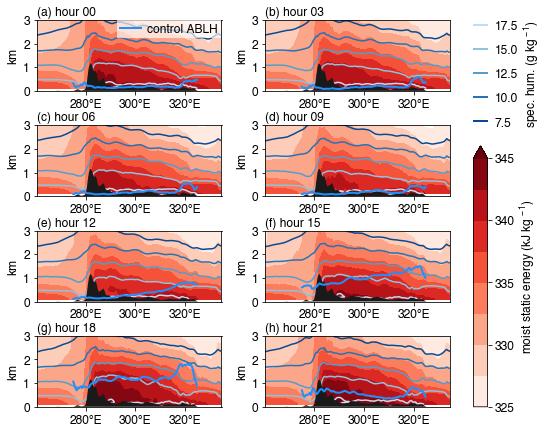

In [58]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(325,346,2.5)
levels_qvapor = numpy.arange(7.5,17.6,2.5)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,mse_400_array[t]/1000.,\
                               levels=levels,\
                               cmap='Reds',extend='max')
    #ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='red',ls='--', label='ABLH high CO$_2$')
    
    contour_lines = ax.contour(xlong[0,:]+360.,z,qvapor_400_array[t]*1000.,\
                               levels=levels_qvapor,\
                               cmap=cmap_partial, extend='both')

    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True,zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()

ax_height = top_pos.y1-bottom_pos.y0

cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar.set_ticks(numpy.arange(325,346,5))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines, cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('spec. hum. (g kg$^{\,-1}$)', fontsize=fontsize)
#cbar_lines_ax.get_children().set_linewidths([2]*7)
#cbar_lines_ax.text(s='water\nvapor', x=0, y=1.05, ha='left', va='bottom', \
#                  transform=cbar_lines_ax.transAxes, fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')


#cbar_qvapor = mp.colorbar(contour_lines)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5, framealpha=0.666)

fig.savefig('mse_400_cross_sections_zcoords.png', dpi=600, bbox_inches='tight', transparent=True)

# background mse with q in energy units

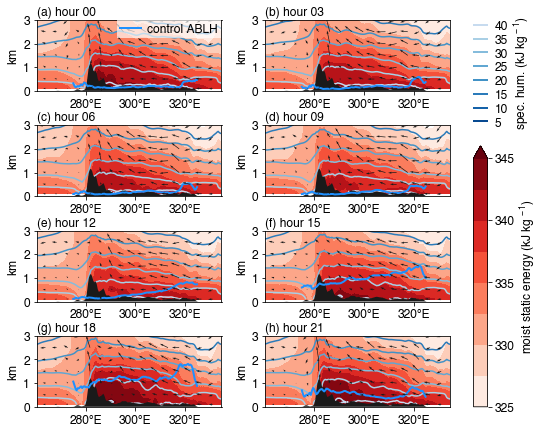

In [59]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(325,346,2.5)
levels_qvapor = numpy.arange(5,41,5) # kJ/kg

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

z_indices=[2,6,7,8,9,10,11,12,13]
every_nth_lon=10
quiver_scale = 2.5 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 1.#.75
quiver_key_scale = 5
quiver_color = '0.1'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,mse_400_array[t]/1000.,\
                               levels=levels,\
                               cmap='Reds',extend='max')
    #ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='red',ls='--', label='ABLH high CO$_2$')
    
    contour_lines = ax.contour(xlong[0,:]+360.,z,qvapor_400_array[t]*L_v/1000.,\
                               levels=levels_qvapor,\
                               cmap=cmap_partial, extend='both')

    ax.quiver(xlong[0,:][::every_nth_lon]+360.,z[z_indices],\
              u_400_array[t][z_indices,::every_nth_lon],\
              w_400_array[t][z_indices,::every_nth_lon]*1000.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3)
    
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True,zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()

ax_height = top_pos.y1-bottom_pos.y0

cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar.set_ticks(numpy.arange(325,346,5))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines, cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')


#cbar_qvapor = mp.colorbar(contour_lines)
#ax_pos = ax_list[0].get_position()
handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                  edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                  loc='upper right', labelspacing=0, \
                  borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                  handletextpad=0.5, framealpha=0.666)

fig.savefig('mse_400_cross_sections_zcoords_energy_units.png', dpi=600, bbox_inches='tight', transparent=True)

In [60]:
z[[2,6,7,8,9,10,11,12,13]]

array([ 0.1,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ], dtype=float32)

/Users/baird/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


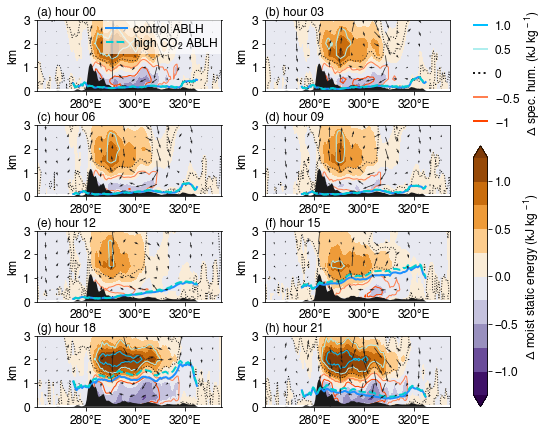

In [61]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.25,1.26,0.25)
levels_qvapor = numpy.arange(-1,1.1,0.5)
#colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

#every_nth_z=3
z_indices=[2,6,7,8,9,10,11,12,13]
every_nth_lon=10
quiver_scale = 0.2 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 1.#.75
quiver_key_scale = 5
quiver_color = '0.1'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               mse_diffs_array[t]/1000.,\
                               levels=levels,\
                               cmap='PuOr_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
    ax.quiver(xlong[0,:][::every_nth_lon]+360.,z[z_indices],\
              u_diffs_array[t][z_indices,::every_nth_lon],\
              w_diffs_array[t][z_indices,::every_nth_lon]*1000.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3)
    if t in [6,7]:
        contour_lines = ax.contour(xlong[0,:]+360.,z,\
                                   qvapor_diffs_array[t]*L_v/1000.,\
                                   levels=levels_qvapor,\
                                   linewidths=1,\
                                   colors=colors_qvapor,\
                                   linestyles=linestyles_qvapor, extend='both')
        contour_lines_list.append(contour_lines)

    else:
        for line in range(levels_qvapor.__len__()):        
            ax.contour(xlong[0,:]+360.,z,\
                                       qvapor_diffs_array[t]*L_v/1000.,\
                                       levels=levels_qvapor[line],\
                                       linewidths=1,\
                                       colors=colors_qvapor[line],\
                                       linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.8,0.81,0.2))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines_ax.set_yticklabels(['$-1$','$-0.5$','0','0.5','1.0'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('mse_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

# temperature changes

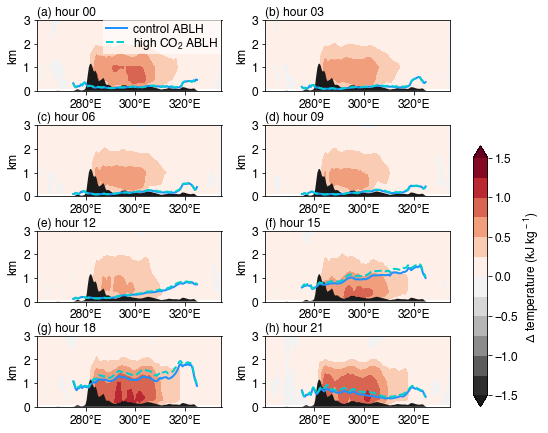

In [62]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.5,1.51,0.25)
levels_qvapor = numpy.arange(-1,1.1,0.5)
#colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               tk_diffs_array[t]*c_p/1000.,\
                               levels=levels,\
                               cmap='RdGy_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
#     if t in [6,7]:
#         contour_lines = ax.contour(xlong[0,:]+360.,z,\
#                                    qvapor_diffs_array[t]*L_v/1000.,\
#                                    levels=levels_qvapor,\
#                                    linewidths=1,\
#                                    colors=colors_qvapor,\
#                                    linestyles=linestyles_qvapor, extend='both')
#         contour_lines_list.append(contour_lines)

#     else:
#         for line in range(levels_qvapor.__len__()):        
#             ax.contour(xlong[0,:]+360.,z,\
#                                        qvapor_diffs_array[t]*L_v/1000.,\
#                                        levels=levels_qvapor[line],\
#                                        linewidths=1,\
#                                        colors=colors_qvapor[line],\
#                                        linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ temperature (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-1,1.1,0.2))

# cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
# cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
# cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
# cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
# cbar_lines.outline.set_visible(False)
# cbar_lines_ax.tick_params(axis='y', which='both', right='off')
# cbar_lines_ax.get_children()[0].set_linewidths(2)
# cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
# cbar_lines_ax.get_children()[1].set_facecolor('None')
# cbar_lines_ax.get_children()[2].set_facecolor('None')
# cbar_lines_ax.set_yticklabels(['$-1$','$-0.5$','0','0.5','1.0'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('temp_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

# qvapor diffs

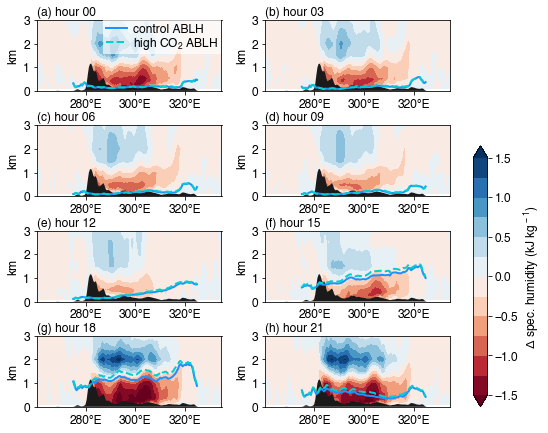

In [63]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.5,1.51,0.25)
levels_qvapor = numpy.arange(-1,1.1,0.5)
#colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               qvapor_diffs_array[t]*L_v/1000.,\
                               levels=levels,\
                               cmap='RdBu',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
#     if t in [6,7]:
#         contour_lines = ax.contour(xlong[0,:]+360.,z,\
#                                    qvapor_diffs_array[t]*L_v/1000.,\
#                                    levels=levels_qvapor,\
#                                    linewidths=1,\
#                                    colors=colors_qvapor,\
#                                    linestyles=linestyles_qvapor, extend='both')
#         contour_lines_list.append(contour_lines)

#     else:
#         for line in range(levels_qvapor.__len__()):        
#             ax.contour(xlong[0,:]+360.,z,\
#                                        qvapor_diffs_array[t]*L_v/1000.,\
#                                        levels=levels_qvapor[line],\
#                                        linewidths=1,\
#                                        colors=colors_qvapor[line],\
#                                        linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ spec. humidity (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-1,1.1,0.2))

# cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
# cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
# cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
# cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
# cbar_lines.outline.set_visible(False)
# cbar_lines_ax.tick_params(axis='y', which='both', right='off')
# cbar_lines_ax.get_children()[0].set_linewidths(2)
# cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
# cbar_lines_ax.get_children()[1].set_facecolor('None')
# cbar_lines_ax.get_children()[2].set_facecolor('None')
# cbar_lines_ax.set_ytickllabels(['$-1$','$-0.5$','0','0.5','1.0'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('qvapor_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

# ptot changes

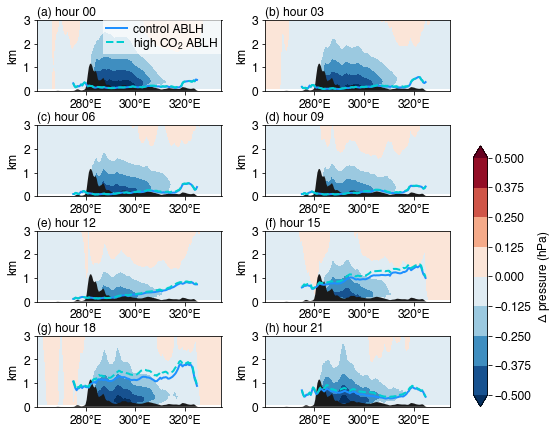

In [64]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.5,0.51,0.125)
levels_qvapor = numpy.arange(-1,1.1,0.5)
#colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               p_tot_diffs_array[t]/100.,\
                               levels=levels,\
                               cmap='RdBu_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ pressure (hPa)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-1,1.1,0.2))

# cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
# cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
# cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
# cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
# cbar_lines.outline.set_visible(False)
# cbar_lines_ax.tick_params(axis='y', which='both', right='off')
# cbar_lines_ax.get_children()[0].set_linewidths(2)
# cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
# cbar_lines_ax.get_children()[1].set_facecolor('None')
# cbar_lines_ax.get_children()[2].set_facecolor('None')
# cbar_lines_ax.set_ytickllabels(['$-1$','$-0.5$','0','0.5','1.0'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('ptotal_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

# geopotential height diffs

/Users/baird/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


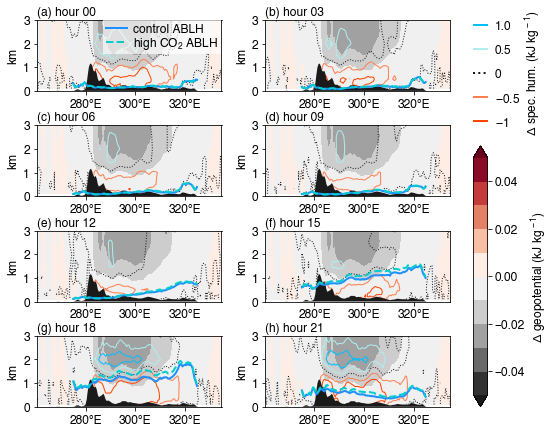

In [65]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.05,0.051,0.01)
levels_qvapor = numpy.arange(-1,1.1,0.5)
#colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               ph_tot_diffs_array[t]/1000.,\
                               levels=levels,\
                               cmap='RdGy_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
    if t in [6,7]:
        contour_lines = ax.contour(xlong[0,:]+360.,z,\
                                   qvapor_diffs_array[t]*L_v/1000.,\
                                   levels=levels_qvapor,\
                                   linewidths=1,\
                                   colors=colors_qvapor,\
                                   linestyles=linestyles_qvapor, extend='both')
        contour_lines_list.append(contour_lines)

    else:
        for line in range(levels_qvapor.__len__()):        
            ax.contour(xlong[0,:]+360.,z,\
                                       qvapor_diffs_array[t]*L_v/1000.,\
                                       levels=levels_qvapor[line],\
                                       linewidths=1,\
                                       colors=colors_qvapor[line],\
                                       linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ geopotential (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-1,1.1,0.2))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines_ax.set_yticklabels(['$-1$','$-0.5$','0','0.5','1.0'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('geopot_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

# 1st day 3hr means

In [66]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_day1_00 = [t.hour in [0,1] and t.day==1 for t in time_datetimes]
times_day1_03 = [t.hour in [2,3,4] and t.day==1 for t in time_datetimes]
times_day1_06 = [t.hour in [5,6,7] and t.day==1 for t in time_datetimes]
times_day1_09 = [t.hour in [8,9,10] and t.day==1 for t in time_datetimes]
times_day1_12 = [t.hour in [11,12,13] and t.day==1 for t in time_datetimes]
times_day1_15 = [t.hour in [14,15,16] and t.day==1 for t in time_datetimes]
times_day1_18 = [t.hour in [17,18,19] and t.day==1 for t in time_datetimes]
times_day1_21 = [t.hour in [20,21,22] and t.day==1 for t in time_datetimes]

In [67]:
# calculate 3 hourly means for 400
p_tot_diffs_t00mean = numpy.nanmean(p_tot_diffs_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
p_tot_diffs_t03mean = numpy.nanmean(p_tot_diffs_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
p_tot_diffs_t06mean = numpy.nanmean(p_tot_diffs_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
p_tot_diffs_t09mean = numpy.nanmean(p_tot_diffs_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
p_tot_diffs_t12mean = numpy.nanmean(p_tot_diffs_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
p_tot_diffs_t15mean = numpy.nanmean(p_tot_diffs_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
p_tot_diffs_t18mean = numpy.nanmean(p_tot_diffs_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
p_tot_diffs_t21mean = numpy.nanmean(p_tot_diffs_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

p_tot_diffs_array_day1 = numpy.array([p_tot_diffs_t00mean, p_tot_diffs_t03mean, p_tot_diffs_t06mean, p_tot_diffs_t09mean, p_tot_diffs_t12mean, p_tot_diffs_t15mean, p_tot_diffs_t18mean, p_tot_diffs_t21mean])

# monthly mean
#p_tot_diffs_time_mean = numpy.mean(u1000[skip_time:,:,:] - p_tot_diffs[skip_time:,:,:], axis=0)
#p_tot_diffs_time_mean_landmask = numpy.copy(p_tot_diffs_time_mean)
#p_tot_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

In [68]:
# calculate 3 hourly means for 400
mse_diffs_t00mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
mse_diffs_t03mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
mse_diffs_t06mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
mse_diffs_t09mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
mse_diffs_t12mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
mse_diffs_t15mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
mse_diffs_t18mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
mse_diffs_t21mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

mse_diffs_array_day1 = numpy.array([mse_diffs_t00mean, mse_diffs_t03mean, mse_diffs_t06mean, mse_diffs_t09mean, mse_diffs_t12mean, mse_diffs_t15mean, mse_diffs_t18mean, mse_diffs_t21mean])

# monthly mean
#mse_diffs_time_mean = numpy.mean(mse_1000[skip_time:,:,:] - mse_diffs[skip_time:,:,:], axis=0)
#mse_diffs_time_mean_landmask = numpy.copy(mse_diffs_time_mean)
#mse_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

In [69]:
# calculate 3 hourly means for 400
qvapor_diffs_t00mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
qvapor_diffs_t03mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
qvapor_diffs_t06mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
qvapor_diffs_t09mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
qvapor_diffs_t12mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
qvapor_diffs_t15mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
qvapor_diffs_t18mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
qvapor_diffs_t21mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

qvapor_diffs_array_day1 = numpy.array([qvapor_diffs_t00mean, qvapor_diffs_t03mean, qvapor_diffs_t06mean, qvapor_diffs_t09mean, qvapor_diffs_t12mean, qvapor_diffs_t15mean, qvapor_diffs_t18mean, qvapor_diffs_t21mean])

# monthly mean
#qvapor_diffs_time_mean = numpy.mean(qvapor_1000[skip_time:,:,:] - qvapor_diffs[skip_time:,:,:], axis=0)
#qvapor_diffs_time_mean_landmask = numpy.copy(qvapor_diffs_time_mean)
#qvapor_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

In [70]:
# calculate 3 hourly means for 400
qvapor_400_t00mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
qvapor_400_t03mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
qvapor_400_t06mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
qvapor_400_t09mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
qvapor_400_t12mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
qvapor_400_t15mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
qvapor_400_t18mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
qvapor_400_t21mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

qvapor_400_array_day1 = numpy.array([qvapor_400_t00mean, qvapor_400_t03mean, qvapor_400_t06mean, qvapor_400_t09mean, qvapor_400_t12mean, qvapor_400_t15mean, qvapor_400_t18mean, qvapor_400_t21mean])

# monthly mean
#qvapor_400_time_mean = numpy.mean(qvapor_1000[skip_time:,:,:] - qvapor_400[skip_time:,:,:], axis=0)
#qvapor_400_time_mean_landmask = numpy.copy(qvapor_400_time_mean)
#qvapor_400_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

In [71]:
# calculate 3 hourly means for 400
tk_diffs_t00mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
tk_diffs_t03mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
tk_diffs_t06mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
tk_diffs_t09mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
tk_diffs_t12mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
tk_diffs_t15mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
tk_diffs_t18mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
tk_diffs_t21mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

tk_diffs_array_day1 = numpy.array([tk_diffs_t00mean, tk_diffs_t03mean, tk_diffs_t06mean, tk_diffs_t09mean, tk_diffs_t12mean, tk_diffs_t15mean, tk_diffs_t18mean, tk_diffs_t21mean])

# monthly mean
#tk_diffs_time_mean = numpy.mean(tk_1000[skip_time:,:,:] - tk_diffs[skip_time:,:,:], axis=0)
#tk_diffs_time_mean_landmask = numpy.copy(tk_diffs_time_mean)
#tk_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

In [72]:
# calculate 3 hourly means for 400
u_400_t00mean = numpy.nanmean(u_400_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
u_400_t03mean = numpy.nanmean(u_400_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
u_400_t06mean = numpy.nanmean(u_400_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
u_400_t09mean = numpy.nanmean(u_400_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
u_400_t12mean = numpy.nanmean(u_400_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
u_400_t15mean = numpy.nanmean(u_400_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
u_400_t18mean = numpy.nanmean(u_400_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
u_400_t21mean = numpy.nanmean(u_400_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

u_400_array_day1 = numpy.array([u_400_t00mean, u_400_t03mean, u_400_t06mean, u_400_t09mean, u_400_t12mean, u_400_t15mean, u_400_t18mean, u_400_t21mean])

# monthly mean
#u_400_time_mean = numpy.mean(u1000[skip_time:,:,:] - u_400[skip_time:,:,:], axis=0)
#u_400_time_mean_landmask = numpy.copy(u_400_time_mean)
#u_400_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

In [73]:
# calculate 3 hourly means for 400
u_diffs_t00mean = numpy.nanmean(u_diffs_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
u_diffs_t03mean = numpy.nanmean(u_diffs_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
u_diffs_t06mean = numpy.nanmean(u_diffs_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
u_diffs_t09mean = numpy.nanmean(u_diffs_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
u_diffs_t12mean = numpy.nanmean(u_diffs_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
u_diffs_t15mean = numpy.nanmean(u_diffs_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
u_diffs_t18mean = numpy.nanmean(u_diffs_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
u_diffs_t21mean = numpy.nanmean(u_diffs_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

u_diffs_array_day1 = numpy.array([u_diffs_t00mean, u_diffs_t03mean, u_diffs_t06mean, u_diffs_t09mean, u_diffs_t12mean, u_diffs_t15mean, u_diffs_t18mean, u_diffs_t21mean])

# monthly mean
#u_diffs_time_mean = numpy.mean(u1000[skip_time:,:,:] - u_diffs[skip_time:,:,:], axis=0)
#u_diffs_time_mean_landmask = numpy.copy(u_diffs_time_mean)
#u_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

In [74]:
# calculate 3 hourly means for 400
w_400_t00mean = numpy.nanmean(w_400_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
w_400_t03mean = numpy.nanmean(w_400_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
w_400_t06mean = numpy.nanmean(w_400_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
w_400_t09mean = numpy.nanmean(w_400_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
w_400_t12mean = numpy.nanmean(w_400_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
w_400_t15mean = numpy.nanmean(w_400_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
w_400_t18mean = numpy.nanmean(w_400_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
w_400_t21mean = numpy.nanmean(w_400_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

w_400_array_day1 = numpy.array([w_400_t00mean, w_400_t03mean, w_400_t06mean, w_400_t09mean, w_400_t12mean, w_400_t15mean, w_400_t18mean, w_400_t21mean])

# monthly mean
#w_400_time_mean = numpy.mean(w_1000[skip_time:,:,:] - w_400[skip_time:,:,:], axis=0)
#w_400_time_mean_landmask = numpy.copy(w_400_time_mean)
#w_400_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

In [75]:
# calculate 3 hourly means for 400
w_diffs_t00mean = numpy.nanmean(w_diffs_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
w_diffs_t03mean = numpy.nanmean(w_diffs_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
w_diffs_t06mean = numpy.nanmean(w_diffs_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
w_diffs_t09mean = numpy.nanmean(w_diffs_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
w_diffs_t12mean = numpy.nanmean(w_diffs_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
w_diffs_t15mean = numpy.nanmean(w_diffs_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
w_diffs_t18mean = numpy.nanmean(w_diffs_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
w_diffs_t21mean = numpy.nanmean(w_diffs_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

w_diffs_array_day1 = numpy.array([w_diffs_t00mean, w_diffs_t03mean, w_diffs_t06mean, w_diffs_t09mean, w_diffs_t12mean, w_diffs_t15mean, w_diffs_t18mean, w_diffs_t21mean])

# monthly mean
#w_diffs_time_mean = numpy.mean(w_1000[skip_time:,:,:] - w_diffs[skip_time:,:,:], axis=0)
#w_diffs_time_mean_landmask = numpy.copy(w_diffs_time_mean)
#w_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

In [76]:
# calculate 3 hourly means for 400
pblh_400_t00mean = numpy.mean(pblh_400_lat_mean[:][times_day1_00,:], axis=0)
pblh_400_t03mean = numpy.mean(pblh_400_lat_mean[:][times_day1_03,:], axis=0)
pblh_400_t06mean = numpy.mean(pblh_400_lat_mean[:][times_day1_06,:], axis=0)
pblh_400_t09mean = numpy.mean(pblh_400_lat_mean[:][times_day1_09,:], axis=0)
pblh_400_t12mean = numpy.mean(pblh_400_lat_mean[:][times_day1_12,:], axis=0)
pblh_400_t15mean = numpy.mean(pblh_400_lat_mean[:][times_day1_15,:], axis=0)
pblh_400_t18mean = numpy.mean(pblh_400_lat_mean[:][times_day1_18,:], axis=0)
pblh_400_t21mean = numpy.mean(pblh_400_lat_mean[:][times_day1_21,:], axis=0)

pblh_1000_t00mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_00,:], axis=0)
pblh_1000_t03mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_03,:], axis=0)
pblh_1000_t06mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_06,:], axis=0)
pblh_1000_t09mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_09,:], axis=0)
pblh_1000_t12mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_12,:], axis=0)
pblh_1000_t15mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_15,:], axis=0)
pblh_1000_t18mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_18,:], axis=0)
pblh_1000_t21mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_21,:], axis=0)

pblh_400_array_day1 = numpy.array([pblh_400_t00mean, pblh_400_t03mean, pblh_400_t06mean, pblh_400_t09mean, pblh_400_t12mean, pblh_400_t15mean, pblh_400_t18mean, pblh_400_t21mean])
pblh_1000_array_day1 = numpy.array([pblh_1000_t00mean, pblh_1000_t03mean, pblh_1000_t06mean, pblh_1000_t09mean, pblh_1000_t12mean, pblh_1000_t15mean, pblh_1000_t18mean, pblh_1000_t21mean])

# monthly mean
#pblh_diffs_time_mean = numpy.mean(pblh_1000[skip_time:,:,:] - pblh_400[skip_time:,:,:], axis=0)
#pblh_diffs_time_mean_landmask = numpy.copy(pblh_diffs_time_mean)
#pblh_diffs_time_mean_landmask[landmask==0] = numpy.nan

In [77]:
mse_400_lat_mean.shape

(241, 26, 289)

In [78]:
# calculate 3 hourly means for 400
mse_400_t00mean = numpy.mean(mse_400_lat_mean[:][times_day1_00,:,:], axis=0)
mse_400_t03mean = numpy.mean(mse_400_lat_mean[:][times_day1_03,:,:], axis=0)
mse_400_t06mean = numpy.mean(mse_400_lat_mean[:][times_day1_06,:,:], axis=0)
mse_400_t09mean = numpy.mean(mse_400_lat_mean[:][times_day1_09,:,:], axis=0)
mse_400_t12mean = numpy.mean(mse_400_lat_mean[:][times_day1_12,:,:], axis=0)
mse_400_t15mean = numpy.mean(mse_400_lat_mean[:][times_day1_15,:,:], axis=0)
mse_400_t18mean = numpy.mean(mse_400_lat_mean[:][times_day1_18,:,:], axis=0)
mse_400_t21mean = numpy.mean(mse_400_lat_mean[:][times_day1_21,:,:], axis=0)

mse_400_array_day1 = numpy.array([mse_400_t00mean, mse_400_t03mean, mse_400_t06mean, mse_400_t09mean, mse_400_t12mean, mse_400_t15mean, mse_400_t18mean, mse_400_t21mean])

# monthly mean
#mse_diffs_time_mean = numpy.mean(mse_1000[skip_time:,:,:] - mse_400[skip_time:,:,:], axis=0)
#mse_diffs_time_mean_landmask = numpy.copy(mse_diffs_time_mean)
#mse_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


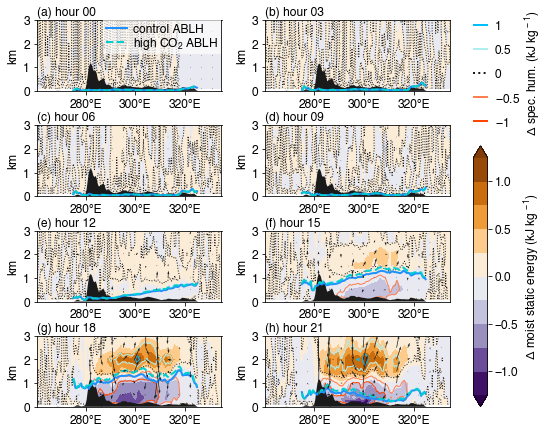

In [79]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.25,1.26,0.25)
levels_qvapor = numpy.arange(-1,1.1,0.5)
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

#every_nth_z=3
z_indices=[2,6,7,8,9,10,11,12,13]
every_nth_lon=10
quiver_scale = 0.25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 1.#.75
quiver_key_scale = 5
quiver_color = '0.1'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               mse_diffs_array_day1[t]/1000.,\
                               levels=levels,\
                               cmap='PuOr_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array_day1[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array_day1[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)

    ax.quiver(xlong[0,:][::every_nth_lon]+360.,z[z_indices],\
              u_diffs_array_day1[t][z_indices,::every_nth_lon],\
              w_diffs_array_day1[t][z_indices,::every_nth_lon]*1000.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3)
    
    if t in [6,7]:
        contour_lines = ax.contour(xlong[0,:]+360.,z,\
                                   qvapor_diffs_array_day1[t]*L_v/1000.,\
                                   levels=levels_qvapor,\
                                   linewidths=1,\
                                   colors=colors_qvapor,\
                                   linestyles=linestyles_qvapor, extend='both')
        contour_lines_list.append(contour_lines)

    else:
        for line in range(levels_qvapor.__len__()):        
            ax.contour(xlong[0,:]+360.,z,\
                                       qvapor_diffs_array_day1[t]*L_v/1000.,\
                                       levels=levels_qvapor[line],\
                                       linewidths=1,\
                                       colors=colors_qvapor[line],\
                                       linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.8,0.81,0.2))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines_ax.set_yticklabels(['$-1$','$-0.5$','0','0.5','1'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('mse_diffs_cross_sections_day1.png', dpi=600, bbox_inches='tight', transparent=True)

/Users/baird/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


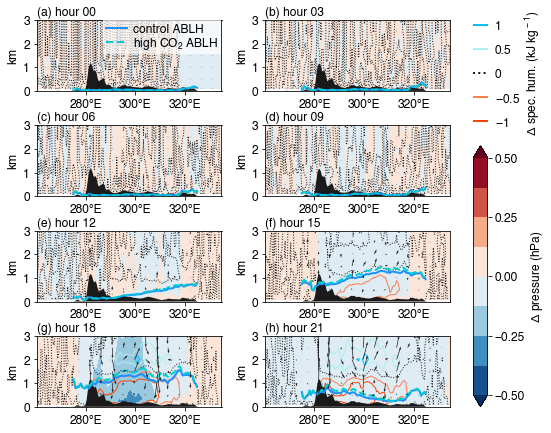

In [80]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.5,0.51,0.125)
levels_qvapor = numpy.arange(-1,1.1,0.5)
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

#every_nth_z=3
z_indices=[2,6,7,8,9,10,11,12,13]
every_nth_lon=10
quiver_scale = 0.25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 1.#.75
quiver_key_scale = 5
quiver_color = '0.1'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               p_tot_diffs_array_day1[t]/100.,\
                               levels=levels,\
                               cmap='RdBu_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array_day1[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array_day1[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)

    ax.quiver(xlong[0,:][::every_nth_lon]+360.,z[z_indices],\
              u_diffs_array_day1[t][z_indices,::every_nth_lon],\
              w_diffs_array_day1[t][z_indices,::every_nth_lon]*1000.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3)
    
    if t in [6,7]:
        contour_lines = ax.contour(xlong[0,:]+360.,z,\
                                   qvapor_diffs_array_day1[t]*L_v/1000.,\
                                   levels=levels_qvapor,\
                                   linewidths=1,\
                                   colors=colors_qvapor,\
                                   linestyles=linestyles_qvapor, extend='both')
        contour_lines_list.append(contour_lines)

    else:
        for line in range(levels_qvapor.__len__()):        
            ax.contour(xlong[0,:]+360.,z,\
                                       qvapor_diffs_array_day1[t]*L_v/1000.,\
                                       levels=levels_qvapor[line],\
                                       linewidths=1,\
                                       colors=colors_qvapor[line],\
                                       linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ pressure (hPa)', fontsize=fontsize)
cbar.set_ticks(numpy.arange(-0.5,0.51,0.25))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines_ax.set_yticklabels(['$-1$','$-0.5$','0','0.5','1'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('p_tot_diffs_cross_sections_day1.png', dpi=600, bbox_inches='tight', transparent=True)

/Users/baird/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


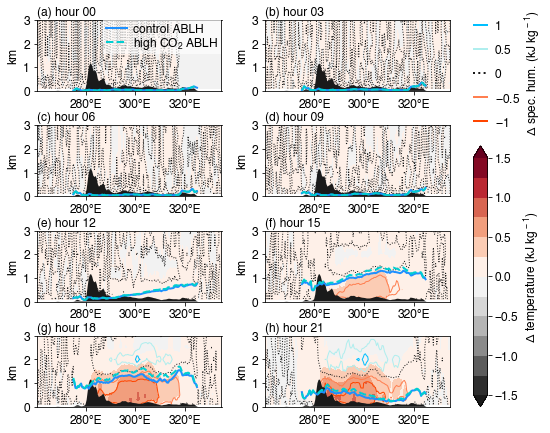

In [81]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.5,1.51,0.25)
levels_qvapor = numpy.arange(-1,1.1,0.5)
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               tk_diffs_array_day1[t]*c_p/1000.,\
                               levels=levels,\
                               cmap='RdGy_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array_day1[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array_day1[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
    if t in [6,7]:
        contour_lines = ax.contour(xlong[0,:]+360.,z,\
                                   qvapor_diffs_array_day1[t]*L_v/1000.,\
                                   levels=levels_qvapor,\
                                   linewidths=1,\
                                   colors=colors_qvapor,\
                                   linestyles=linestyles_qvapor, extend='both')
        contour_lines_list.append(contour_lines)

    else:
        for line in range(levels_qvapor.__len__()):        
            ax.contour(xlong[0,:]+360.,z,\
                                       qvapor_diffs_array_day1[t]*L_v/1000.,\
                                       levels=levels_qvapor[line],\
                                       linewidths=1,\
                                       colors=colors_qvapor[line],\
                                       linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ temperature (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar.set_ticks(numpy.arange(-1.5,1.51,0.5))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines_ax.set_yticklabels(['$-1$','$-0.5$','0','0.5','1'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('temp_diffs_cross_sections_day1.png', dpi=600, bbox_inches='tight', transparent=True)

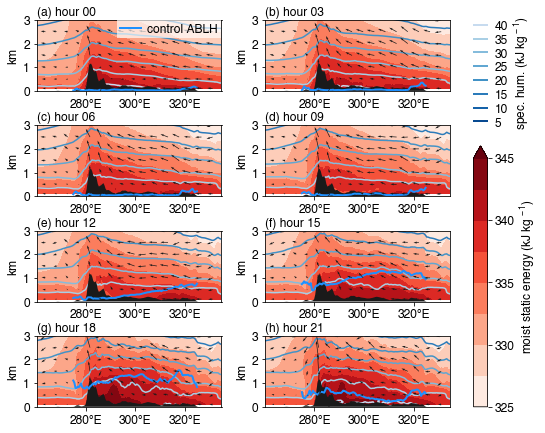

In [82]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(325,346,2.5)
levels_qvapor = numpy.arange(5,41,5) # kJ/kg

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

#every_nth_z=3
z_indices=[2,6,7,8,9,10,11,12,13]
every_nth_lon=10
quiver_scale = 2.5 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 1.#.75
quiver_key_scale = 5
quiver_color = '0.1'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,mse_400_array_day1[t]/1000.,\
                               levels=levels,\
                               cmap='Reds',extend='max')
    #ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='red',ls='--', label='ABLH high CO$_2$')
    
    contour_lines = ax.contour(xlong[0,:]+360.,z,qvapor_400_array_day1[t]*L_v/1000.,\
                               levels=levels_qvapor,\
                               cmap=cmap_partial, extend='both')

    ax.plot(xlong[0,:]+360.,pblh_400_array_day1[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)

    ax.quiver(xlong[0,:][::every_nth_lon]+360.,z[z_indices],\
              u_400_array_day1[t][z_indices,::every_nth_lon],\
              w_400_array_day1[t][z_indices,::every_nth_lon]*1000.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True,zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()

ax_height = top_pos.y1-bottom_pos.y0

cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar.set_ticks(numpy.arange(325,346,5))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines, cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar_lines_ax.get_children().set_linewidths([2]*7)
#cbar_lines_ax.text(s='water\nvapor', x=0, y=1.05, ha='left', va='bottom', \
#                  transform=cbar_lines_ax.transAxes, fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')


#cbar_qvapor = mp.colorbar(contour_lines)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(.997,.993), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5, framealpha=0.666)

fig.savefig('mse_400_cross_sections_zcoords_day1.png', dpi=600, bbox_inches='tight', transparent=True)

# 10th day 3hr means

# Hövmoller

In [84]:
weights_0_1km = numpy.hstack((numpy.array(z[0]), numpy.diff(z[[0,1,2,3,4,5,6,7]])))

# mse layer means for Hovmoller

In [111]:
mse_diffs_lat_subset.shape
mse_diffs_lat_subset_1_3km = numpy.nanmean(mse_diffs_lat_subset[:,[7,8,9,10,11],:,:], axis=1)
mse_diffs_lat_subset_1_3km_latmean = numpy.nanmean(mse_diffs_lat_subset_1_3km, axis=1)

mse_diffs_lat_subset_0_1km = numpy.nanmean(mse_diffs_lat_subset[:,[0,1,2,3,4,5],:,:], axis=1)
mse_diffs_lat_subset_0_1km_latmean = numpy.nanmean(mse_diffs_lat_subset_0_1km, axis=1)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


# raintot latmean for Hovmoller

In [122]:
#raintot_diffs_lat_subset.shape
raintot_diffs_lat_subset_latmean = numpy.mean(raintot_diffs_lat_subset, axis=1)

# raintot hourly latmean for Hovmoller

In [124]:
raintot_hourly_diffs_lat_subset_latmean = numpy.mean(raintot_hourly_diffs_lat_subset, axis=1)

In [86]:
import matplotlib.dates
import matplotlib.gridspec

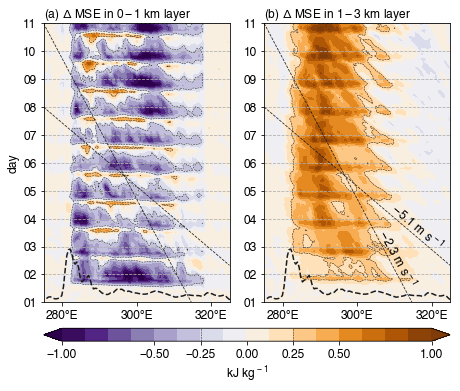

In [87]:
fontsize=12
fig = mp.figure(figsize=(6.5,4.5))
ax1=fig.add_subplot(121)

levels=numpy.arange(-1,1.1,0.125)

contour_plot = ax1.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax1.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])
ax1.set_ylabel('day', fontsize=fontsize)
ax1.text(s='(a) $\Delta$ MSE in $0-1$ km layer', x=0, y=1.02,\
         fontsize=fontsize, transform=ax1.transAxes)

ax1.set_xticks([280,300,320])
ax1.set_xticklabels(xticks_format)
ax1.set_xlim(275.,325.)
ax1.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax1.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax1.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax1.tick_params(labelsize=fontsize)
ax1.yaxis.grid(True,linestyle='--')




ax2=fig.add_subplot(122)
contour_plot = ax2.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax2.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])
ax2.text(s='(b) $\Delta$ MSE in $1-3$ km layer', x=0, y=1.02,\
         fontsize=fontsize, transform=ax2.transAxes)
ax2.set_xticks([280,300,320])
ax2.set_xticklabels(xticks_format)
ax2.set_xlim(275.,325.)
ax2.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax2.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax2.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax2.tick_params(labelsize=fontsize)

fig.tight_layout()





ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
cbar_ax = fig.add_axes([ax1_pos.x0,ax1_pos.y0-0.12,ax2_pos.x1-ax1_pos.x0,0.04])
cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_ticks([-1.,-.5,-0.25,0,0.25,.5,1])
cbar_ax.axvline(cbar_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
cbar_ax.axvline(cbar_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)

ax1_orog = fig.add_axes([ax1_pos.x0,ax1_pos.y0,ax1_pos.width,ax1_pos.height*0.2])
ax1_orog.axis('off')
ax1_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax1_orog.set_xlim(ax1.get_xlim())

ax2_orog = fig.add_axes([ax2_pos.x0,ax2_pos.y0,ax2_pos.width,ax2_pos.height*0.2])
ax2_orog.axis('off')
ax2_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax2_orog.set_xlim(ax2.get_xlim())#xlong.min()+55.+360.,xlong.max()+360.)

ax2.yaxis.grid(True,linestyle='--')

speed1 = 2.3 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed1
slope1 = dt/-dx # sec/meter
intercept1 = 10*dt
xvals1 = numpy.linspace(ax1.get_xlim()[0],ax1.get_xlim()[1],100)
xvals1_m = xvals1*50000.
yvals1 = slope1*(xvals1_m-ax2.get_xlim()[0]*50000) + intercept1
start_date = datetime.datetime(1979,1,1,0)
yvals1_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals1]

speed2 = 5.1 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed2
slope2 = dt/-dx # sec/meter
intercept2 = 7.*dt
xvals2 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals2_m = xvals2*50000.
yvals2 = slope2*(xvals2_m-ax2.get_xlim()[0]*50000) + intercept2
start_date = datetime.datetime(1979,1,1,0)
yvals2_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals2]


ax1.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax1.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

ax2.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax2.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

plot_ratio = ax2.get_data_ratio()

slope_rotation1 = numpy.degrees(numpy.arctan(slope1/plot_ratio))
ax2.text(s='$-\,$'+str(speed1)+' m s$^{\,-1}$',x=0.715,y=0.16,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation1+4)

slope_rotation2 = numpy.degrees(numpy.arctan(slope2/plot_ratio))
ax2.text(s='$-\,$'+str(speed2)+' m s$^{\,-1}$',x=0.82,y=0.27,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation2+4)

fig.savefig('figureXX_hovmoller.png',dpi=600,bbox_inches='tight',transparent=True)

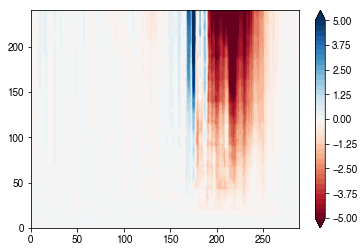

In [119]:
cf=mp.contourf(raintot_diffs_lat_subset_latmean,levels=numpy.arange(-5,5.1,0.25),extend='both',cmap='RdBu');mp.colorbar(cf)

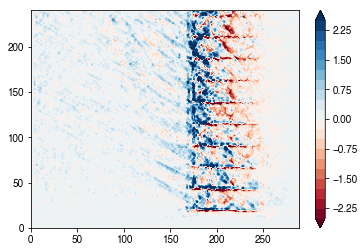

In [130]:
cf=mp.contourf(raintot_hourly_diffs_lat_subset_latmean*24.,levels=numpy.arange(-2.5,2.51,0.25),extend='both',cmap='RdBu');mp.colorbar(cf)

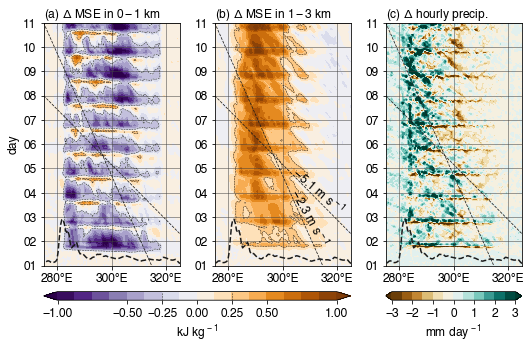

In [168]:
fontsize=12
fig = mp.figure(figsize=(7.5,4))

ax1=fig.add_subplot(131)

levels=numpy.arange(-1,1.1,0.125)
levels_precip = numpy.arange(-3,3.1,0.5)

contour_plot = ax1.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax1.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])
ax1.set_ylabel('day', fontsize=fontsize)
ax1.text(s='(a) $\Delta$ MSE in $0-1$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax1.transAxes)

ax1.set_xticks([280,300,320])
ax1.set_xticklabels(xticks_format)
ax1.set_xlim(275.,325.)
ax1.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax1.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax1.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax1.tick_params(labelsize=fontsize)




ax2=fig.add_subplot(132)
contour_plot = ax2.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax2.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])

ax2.text(s='(b) $\Delta$ MSE in $1-3$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax2.transAxes)
ax2.set_xticks([280,300,320])
ax2.set_xticklabels(xticks_format)
ax2.set_xlim(275.,325.)
ax2.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax2.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax2.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax2.tick_params(labelsize=fontsize)

ax3 = fig.add_subplot(133)
contour_rain = ax3.contourf(xlong[0,:]+360.,time_datetimes,\
                           raintot_hourly_diffs_lat_subset_latmean*24.,\
                           levels=levels_precip,\
                           cmap='BrBG', extend='both')
# contour_rain = ax3.pcolor(xlong[0,:]+360.,time_datetimes,\
#                            raintot_hourly_diffs_lat_subset_latmean*24.,\
#                            vmin=levels_precip.min(),vmax=levels_precip.max(),\
#                            cmap='BrBG',snap=True)
ax3.text(s='(c) $\Delta$ hourly precip.', x=0, y=1.02,\
         fontsize=fontsize, transform=ax3.transAxes)
ax3.set_xticks([280,300,320])
ax3.set_xticklabels(xticks_format)
ax3.set_xlim(275.,325.)
ax3.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax3.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax3.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax3.tick_params(labelsize=fontsize)

fig.tight_layout()

ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()

cbar1_ax = fig.add_axes([ax1_pos.x0,ax1_pos.y0-0.12,ax2_pos.x1-ax1_pos.x0,0.03])
cbar1 = mp.colorbar(contour_plot, cax=cbar1_ax, orientation='horizontal')
cbar1_ax.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1.,-.5,-0.25,0,0.25,.5,1])
cbar1_ax.axvline(cbar1_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
cbar1_ax.axvline(cbar1_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar1.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)



cbar2_ax = fig.add_axes([ax3_pos.x0,ax3_pos.y0-0.12,ax3_pos.width,0.03])
cbar2 = mp.colorbar(contour_rain, cax=cbar2_ax, orientation='horizontal')
cbar2_ax.tick_params(labelsize=fontsize)
cbar2.set_ticks([-3,-2,-1,0,1,2,3])
#cbar2_ax.axvline(cbar2_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
#cbar2_ax.axvline(cbar2_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar2.set_label('mm day$^{\,-1}$', fontsize=fontsize)



ax1_orog = fig.add_axes([ax1_pos.x0,ax1_pos.y0,ax1_pos.width,ax1_pos.height*0.2])
ax1_orog.axis('off')
ax1_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax1_orog.set_xlim(ax1.get_xlim())

ax2_orog = fig.add_axes([ax2_pos.x0,ax2_pos.y0,ax2_pos.width,ax2_pos.height*0.2])
ax2_orog.axis('off')
ax2_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax2_orog.set_xlim(ax2.get_xlim())#xlong.min()+55.+360.,xlong.max()+360.)

ax3_orog = fig.add_axes([ax3_pos.x0,ax3_pos.y0,ax3_pos.width,ax3_pos.height*0.2])
ax3_orog.axis('off')
ax3_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax3_orog.set_xlim(ax1.get_xlim())

ax1.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax1.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)

speed1 = 2.3 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed1
slope1 = dt/-dx # sec/meter
intercept1 = 10*dt
xvals1 = numpy.linspace(ax1.get_xlim()[0],ax1.get_xlim()[1],100)
xvals1_m = xvals1*50000.
yvals1 = slope1*(xvals1_m-ax2.get_xlim()[0]*50000) + intercept1
start_date = datetime.datetime(1979,1,1,0)
yvals1_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals1]

speed2 = 5.1 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed2
slope2 = dt/-dx # sec/meter
intercept2 = 7.*dt
xvals2 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals2_m = xvals2*50000.
yvals2 = slope2*(xvals2_m-ax2.get_xlim()[0]*50000) + intercept2
start_date = datetime.datetime(1979,1,1,0)
yvals2_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals2]


ax1.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax1.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

ax2.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax2.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

ax3.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax3.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

plot_ratio = ax2.get_data_ratio()

slope_rotation1 = numpy.degrees(numpy.arctan(slope1/plot_ratio))
ax2.text(s='$-\,$'+str(speed1)+' m s$^{\,-1}$',x=0.69,y=0.2,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation1+4)

slope_rotation2 = numpy.degrees(numpy.arctan(slope2/plot_ratio))
ax2.text(s='$-\,$'+str(speed2)+' m s$^{\,-1}$',x=0.755,y=0.31,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation2+4)

fig.savefig('figureXX_hovmoller_with_rain_diffs.png',dpi=600,bbox_inches='tight',transparent=True)

In [163]:
first5days_indices = [t.day in range(1,6) for t in time_datetimes]

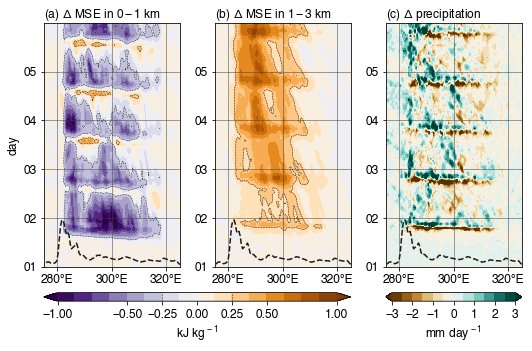

In [167]:
fontsize=12
fig = mp.figure(figsize=(7.5,4))

ax1=fig.add_subplot(131)

levels=numpy.arange(-1,1.1,0.125)
levels_precip = numpy.arange(-3,3.1,0.5)

contour_plot = ax1.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax1.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])
ax1.set_ylabel('day', fontsize=fontsize)
ax1.text(s='(a) $\Delta$ MSE in $0-1$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax1.transAxes)

ax1.set_xticks([280,300,320])
ax1.set_xticklabels(xticks_format)
ax1.set_xlim(275.,325.)
ax1.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,6))
ax1.set_yticks(time_datetimes[first5days_indices][[t.hour==0 for t in time_datetimes[first5days_indices]]])
ax1.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax1.tick_params(labelsize=fontsize)




ax2=fig.add_subplot(132)
contour_plot = ax2.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax2.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])

ax2.text(s='(b) $\Delta$ MSE in $1-3$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax2.transAxes)
ax2.set_xticks([280,300,320])
ax2.set_xticklabels(xticks_format)
ax2.set_xlim(275.,325.)
ax2.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,6))
ax2.set_yticks(time_datetimes[first5days_indices][[t.hour==0 for t in time_datetimes[first5days_indices]]])
ax2.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax2.tick_params(labelsize=fontsize)

ax3 = fig.add_subplot(133)
contour_rain = ax3.contourf(xlong[0,:]+360.,time_datetimes,\
                           raintot_hourly_diffs_lat_subset_latmean*24.,\
                           levels=levels_precip,\
                           cmap='BrBG', extend='both')
# contour_rain = ax3.pcolor(xlong[0,:]+360.,time_datetimes,\
#                            raintot_hourly_diffs_lat_subset_latmean*24.,\
#                            vmin=levels_precip.min(),vmax=levels_precip.max(),\
#                            cmap='BrBG',snap=True)
ax3.text(s='(c) $\Delta$ precipitation', x=0, y=1.02,\
         fontsize=fontsize, transform=ax3.transAxes)
ax3.set_xticks([280,300,320])
ax3.set_xticklabels(xticks_format)
ax3.set_xlim(275.,325.)
ax3.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,6))
ax3.set_yticks(time_datetimes[first5days_indices][[t.hour==0 for t in time_datetimes[first5days_indices]]])
ax3.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax3.tick_params(labelsize=fontsize)

fig.tight_layout()

ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()

cbar1_ax = fig.add_axes([ax1_pos.x0,ax1_pos.y0-0.12,ax2_pos.x1-ax1_pos.x0,0.03])
cbar1 = mp.colorbar(contour_plot, cax=cbar1_ax, orientation='horizontal')
cbar1_ax.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1.,-.5,-0.25,0,0.25,.5,1])
cbar1_ax.axvline(cbar1_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
cbar1_ax.axvline(cbar1_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar1.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)



cbar2_ax = fig.add_axes([ax3_pos.x0,ax3_pos.y0-0.12,ax3_pos.width,0.03])
cbar2 = mp.colorbar(contour_rain, cax=cbar2_ax, orientation='horizontal')
cbar2_ax.tick_params(labelsize=fontsize)
cbar2.set_ticks([-3,-2,-1,0,1,2,3])
#cbar2_ax.axvline(cbar2_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
#cbar2_ax.axvline(cbar2_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar2.set_label('mm day$^{\,-1}$', fontsize=fontsize)



ax1_orog = fig.add_axes([ax1_pos.x0,ax1_pos.y0,ax1_pos.width,ax1_pos.height*0.2])
ax1_orog.axis('off')
ax1_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax1_orog.set_xlim(ax1.get_xlim())

ax2_orog = fig.add_axes([ax2_pos.x0,ax2_pos.y0,ax2_pos.width,ax2_pos.height*0.2])
ax2_orog.axis('off')
ax2_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax2_orog.set_xlim(ax2.get_xlim())#xlong.min()+55.+360.,xlong.max()+360.)

ax3_orog = fig.add_axes([ax3_pos.x0,ax3_pos.y0,ax3_pos.width,ax3_pos.height*0.2])
ax3_orog.axis('off')
ax3_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax3_orog.set_xlim(ax1.get_xlim())

ax1.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax1.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)

speed1 = 2.3 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed1
slope1 = dt/-dx # sec/meter
intercept1 = 10*dt
xvals1 = numpy.linspace(ax1.get_xlim()[0],ax1.get_xlim()[1],100)
xvals1_m = xvals1*50000.
yvals1 = slope1*(xvals1_m-ax2.get_xlim()[0]*50000) + intercept1
start_date = datetime.datetime(1979,1,1,0)
yvals1_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals1]

speed2 = 5.1 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed2
slope2 = dt/-dx # sec/meter
intercept2 = 7.*dt
xvals2 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals2_m = xvals2*50000.
yvals2 = slope2*(xvals2_m-ax2.get_xlim()[0]*50000) + intercept2
start_date = datetime.datetime(1979,1,1,0)
yvals2_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals2]


# ax1.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
# ax1.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

# ax2.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
# ax2.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

# ax3.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
# ax3.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

# plot_ratio = ax2.get_data_ratio()

# slope_rotation1 = numpy.degrees(numpy.arctan(slope1/plot_ratio))
# ax2.text(s='$-\,$'+str(speed1)+' m s$^{\,-1}$',x=0.69,y=0.2,transform=ax2.transAxes,\
#          ha='center',\
#          va='center',\
#          fontsize=fontsize,\
#          rotation=slope_rotation1+4)

# slope_rotation2 = numpy.degrees(numpy.arctan(slope2/plot_ratio))
# ax2.text(s='$-\,$'+str(speed2)+' m s$^{\,-1}$',x=0.755,y=0.31,transform=ax2.transAxes,\
#          ha='center',\
#          va='center',\
#          fontsize=fontsize,\
#          rotation=slope_rotation2+4)

fig.savefig('figureXX_hovmoller_with_rain_diffs_first5days.png',dpi=600,bbox_inches='tight',transparent=True)

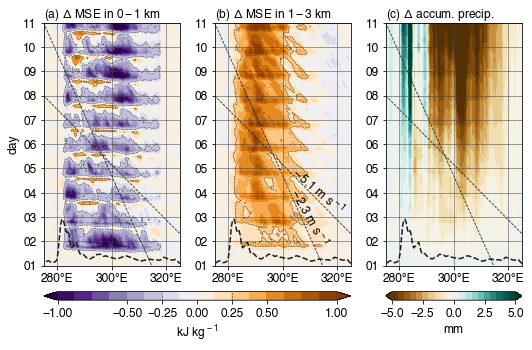

In [159]:
fontsize=12
fig = mp.figure(figsize=(7.5,4))

ax1=fig.add_subplot(131)

levels=numpy.arange(-1,1.1,0.125)
levels_precip = numpy.arange(-5,5.1,0.5)

contour_plot = ax1.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax1.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])
ax1.set_ylabel('day', fontsize=fontsize)
ax1.text(s='(a) $\Delta$ MSE in $0-1$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax1.transAxes)

ax1.set_xticks([280,300,320])
ax1.set_xticklabels(xticks_format)
ax1.set_xlim(275.,325.)
ax1.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax1.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax1.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax1.tick_params(labelsize=fontsize)




ax2=fig.add_subplot(132)
contour_plot = ax2.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax2.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])

ax2.text(s='(b) $\Delta$ MSE in $1-3$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax2.transAxes)
ax2.set_xticks([280,300,320])
ax2.set_xticklabels(xticks_format)
ax2.set_xlim(275.,325.)
ax2.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax2.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax2.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax2.tick_params(labelsize=fontsize)

ax3 = fig.add_subplot(133)
contour_rain = ax3.contourf(xlong[0,:]+360.,time_datetimes,\
                           raintot_diffs_lat_subset_latmean,\
                           levels=levels_precip,\
                           cmap='BrBG', extend='both')
# contour_rain = ax3.pcolor(xlong[0,:]+360.,time_datetimes,\
#                            raintot_hourly_diffs_lat_subset_latmean*24.,\
#                            vmin=levels_precip.min(),vmax=levels_precip.max(),\
#                            cmap='BrBG',snap=True)
ax3.text(s='(c) $\Delta$ accum. precip.', x=0, y=1.02,\
         fontsize=fontsize, transform=ax3.transAxes)
ax3.set_xticks([280,300,320])
ax3.set_xticklabels(xticks_format)
ax3.set_xlim(275.,325.)
ax3.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax3.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax3.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax3.tick_params(labelsize=fontsize)

fig.tight_layout()

ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()

cbar1_ax = fig.add_axes([ax1_pos.x0,ax1_pos.y0-0.12,ax2_pos.x1-ax1_pos.x0,0.03])
cbar1 = mp.colorbar(contour_plot, cax=cbar1_ax, orientation='horizontal')
cbar1_ax.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1.,-.5,-0.25,0,0.25,.5,1])
cbar1_ax.axvline(cbar1_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
cbar1_ax.axvline(cbar1_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar1.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)



cbar2_ax = fig.add_axes([ax3_pos.x0,ax3_pos.y0-0.12,ax3_pos.width,0.03])
cbar2 = mp.colorbar(contour_rain, cax=cbar2_ax, orientation='horizontal')
cbar2_ax.tick_params(labelsize=fontsize)
cbar2.set_ticks([-5,-2.5,0,2.5,5])
#cbar2_ax.axvline(cbar2_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
#cbar2_ax.axvline(cbar2_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar2.set_label('mm', fontsize=fontsize)



ax1_orog = fig.add_axes([ax1_pos.x0,ax1_pos.y0,ax1_pos.width,ax1_pos.height*0.2])
ax1_orog.axis('off')
ax1_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax1_orog.set_xlim(ax1.get_xlim())

ax2_orog = fig.add_axes([ax2_pos.x0,ax2_pos.y0,ax2_pos.width,ax2_pos.height*0.2])
ax2_orog.axis('off')
ax2_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax2_orog.set_xlim(ax2.get_xlim())#xlong.min()+55.+360.,xlong.max()+360.)

ax3_orog = fig.add_axes([ax3_pos.x0,ax3_pos.y0,ax3_pos.width,ax3_pos.height*0.2])
ax3_orog.axis('off')
ax3_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax3_orog.set_xlim(ax1.get_xlim())

ax1.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax1.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)

speed1 = 2.3 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed1
slope1 = dt/-dx # sec/meter
intercept1 = 10*dt
xvals1 = numpy.linspace(ax1.get_xlim()[0],ax1.get_xlim()[1],100)
xvals1_m = xvals1*50000.
yvals1 = slope1*(xvals1_m-ax2.get_xlim()[0]*50000) + intercept1
start_date = datetime.datetime(1979,1,1,0)
yvals1_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals1]

speed2 = 5.1 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed2
slope2 = dt/-dx # sec/meter
intercept2 = 7.*dt
xvals2 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals2_m = xvals2*50000.
yvals2 = slope2*(xvals2_m-ax2.get_xlim()[0]*50000) + intercept2
start_date = datetime.datetime(1979,1,1,0)
yvals2_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals2]


ax1.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax1.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

ax2.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax2.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

ax3.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax3.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

plot_ratio = ax2.get_data_ratio()

slope_rotation1 = numpy.degrees(numpy.arctan(slope1/plot_ratio))
ax2.text(s='$-\,$'+str(speed1)+' m s$^{\,-1}$',x=0.69,y=0.2,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation1+4)

slope_rotation2 = numpy.degrees(numpy.arctan(slope2/plot_ratio))
ax2.text(s='$-\,$'+str(speed2)+' m s$^{\,-1}$',x=0.755,y=0.31,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation2+4)

fig.savefig('figureXX_hovmoller_with_SUMMED_rain_diffs.png',dpi=600,bbox_inches='tight',transparent=True)

In [88]:
xlong_indices_280_310 = (xlong[0,:]+360. >= 280.) & (xlong[0,:]+360 <= 310.)

In [89]:
uwind_mean = u_400_lat_mean[:,[0,1,2,3,4,5],:]
uwind_mean = numpy.nanmean(uwind_mean[:,:,xlong_indices_280_310])
print(uwind_mean)

-2.28921


In [90]:
uwind_mean = u_400_lat_mean[:,[7,8,9,10,11],:]
uwind_mean = numpy.nanmean(uwind_mean[:,:,xlong_indices_280_310])
print(uwind_mean)

-5.12647
